## Data Science 101

In [1]:
# Importing packages for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib as plt

<h3>First we need data</h3>
The data is on taxi journeys in new york city. We can use Pandas to read in the file.

More information describing the data is available from the New York City Authorities <a href="http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml">here</a>.

In [2]:
taxi_data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-01.csv')

<h3>Let's see how much data we have</h3>

In [3]:
taxi_data.shape

(1445285, 21)

So we have 1.4 million observations over 21 variables. That's big enough to kill Excel, best stick to Python!

<h3>Now let's take a look at the data itself</h3>
Let's take a peek at the data using .head() to get the first 5 rows
This is displayed using Jupyter's HTML table formatting so that it is prettier than standard Python tables.

In [4]:
taxi_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0
3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0
4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0


<h3>Let's look at the data type for each variable in the table</h3>

In [5]:
taxi_data.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

Note that the pick up and drop off times are objects (this usually means strings) rather than dates.

Let's change that so that we are able to do date arithmetic with them if we need later on.

In [6]:
taxi_data.lpep_pickup_datetime = pd.to_datetime(taxi_data.lpep_pickup_datetime)
taxi_data.Lpep_dropoff_datetime = pd.to_datetime(taxi_data.Lpep_dropoff_datetime)

<h5>Making sure that something has changed...</h5>

In [7]:
taxi_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
dtype: object

<h3>Let's break our data up so we have something more useful</h3>

We can select a few columns that make sense and copy them into a new table

In [8]:
location_information = taxi_data[["Pickup_longitude", "Pickup_latitude", "Dropoff_longitude", "Dropoff_latitude", "Trip_distance"]]
location_information.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance
0,-73.928642,40.680611,-73.924278,40.698044,1.46
1,-73.952675,40.723175,-73.923920,40.761379,3.56
2,-73.971611,40.676105,-74.013161,40.646072,3.79
3,-73.989502,40.669579,-74.000648,40.689034,3.01
4,-73.964729,40.682854,-73.940720,40.663013,2.55


Now let's get a sense for the shape of the data looking at summary statistics for the amount paid for each ride

In [9]:
taxi_data.Total_amount.describe()

count    1.445285e+06
mean     1.441838e+01
std      1.201146e+01
min     -4.975000e+02
25%      7.800000e+00
50%      1.116000e+01
75%      1.730000e+01
max      1.000800e+03
Name: Total_amount, dtype: float64

Given that someone seems to have paid -$500 for a taxi ride we need to clean the data

...data clensing what all data scientists love.

This can be done by taking the trip data only where the amount paid is strictly positive.

In [10]:
sensible_trips = taxi_data[taxi_data.Total_amount > 0]

<h3>We can now start to explore the power of Pandas!</h3>

Panads is based on NumPy which itself is based on the idea of matrix algrbra.

As such mutliplying by a scalar, adding one matrix/vector/list to another and dividing one matrix by another or a scalar leads to element wise operations.

Let's use this to look at how generous people are. Let's look at tips as a percentage of the total cost of the trip.

In [11]:
sensible_trips.tip_percentage = 100 * sensible_trips.Tip_amount / sensible_trips.Total_amount
sensible_trips.tip_percentage.describe()

count    1.438657e+06
mean     7.098524e+00
std      9.227385e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
dtype: float64

So it looks like at least half of taxi journeys in New York don't warrant a tip. Maybe Americans tip less than we're led to believe. 

It may be more interesting to see how tips vary by the number of riders. Are larger groups more generous or simply expect others to bare the burden of tipping?

Pandas has a groupby method for dataframes that (as the name suggests) groups the elements of the data frame by the variable passed to the method call.

We group by passenger count in the block below in order to then look at the average tip for each number of passengers.

Note that Pandas has built in methods to find the average and the standard deviation of the values within each group.

In [12]:
means = sensible_trips.tip_percentage.groupby(sensible_trips.Passenger_count).mean()
stds = sensible_trips.tip_percentage.groupby(sensible_trips.Passenger_count).std()
tip_percentages = pd.DataFrame({'mean' : means, 'std. dev.' : stds})
tip_percentages

,mean,std. dev.
Passenger_count,,
0,5.381223,9.442450
1,7.086584,9.223079
2,7.152722,9.339757
3,7.475305,9.441627
4,6.517776,9.454753
5,7.032997,9.038921
6,7.329714,8.920193
7,4.528820,7.977901
8,2.981666,5.923512


<h3>Data Visualisation</h3>

A picture speaks a thousand words so let's make one.
Let's make a bar chart for the tip summary we created above. 
We have the average values for each number of passengers so let's plot that.

To do this we will use the matplotlib library (the pyplot bit). This is the standard plotting tool to work with Pandas and NumPy but there are many other visualisation tools to explore. We need to tell Jupyter (the software enabling us to code in a web page) how to treat the images created. We'll just put them inline for now, you can have fancy interaction and save images and make pdfs but we'll leave the funky stuff for later (this is the purpose of `%matplotlib inline`).

First we create a figure and get hold of the axes.

Then we plot the means, one mean for each value in the 'index' of the table. In Pandas the index is the number of the row starting from 0 by default however dataframes can be updated to use any desired column as an index (so long as it contains unique values). The default indexing can be seen in our earlier dataframes when we first brought the data in. In the case of the dataframe we made in the cell above the index is the passenger_count since this is what we grouped by when collapsing the data set. 

Being on an integer axis each column can be up to 1 unit wide. We set the width of each column to be 0.8 so that there is a little space between bars to aid in differentiating one from another. 

We align the bars to be centred on the value they represent rather than starting from that point (the default). This means that the bar for 3 passengers runs from 2.5 to 3.5 for example (in fact 2.6 to 3.4 since we leave a little space either side).

matplotlib sets the axis ranges by default but it isn't always perfect at doing so. Sometimes we have to set the range ourselves and we do this here for the x axis in order to adjust for the centre alignment of the bars (axes.set_xlim sets the limits of the x axis). The package also determines the interval of the axis ticks but again in this case it wasn't ideal on the x axis so we set our own labels by passing the plot the list of passenger counts (axes.set_xticks sets the list of values to use as ticks on the axis). Setting the tick values is often useful for named categories and can be useful in setting the x limits implicitly.

Finally we label the axes and remove the tick marks on the x axes and the right hand y axis to clean things up.


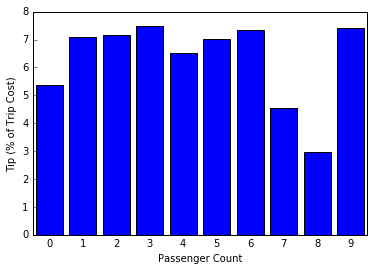

In [13]:
%matplotlib inline
figure, axes = plt.pyplot.subplots()
bar_width = 0.8
bar_chart = axes.bar(tip_percentages.index, tip_percentages['mean'].values, bar_width, align='center')
axes.set_xlim(-0.5,9.5)
axes.set_xticks(tip_percentages.index)
axes.set_ylabel('Tip (% of Trip Cost)')
axes.set_xlabel('Passenger Count')
axes.xaxis.set_ticks_position('none') 
axes.yaxis.tick_left()

We have more analysis than just the averages though, so why not show it?

Let's create a plot with the standard deviations to give an idea of spread as well as location. This is not necessarily a robust statistical approach or even a particularly meaningful plot but for the purposes of a plotting tutorial it looks good.

Again we start by creating a figure and taking control of the axes. 
Then we plot a different kind fo chart - an error bar chart. This takes the x values, the y values and yerr (y error) values. We also get to choose how to mark the means - we choose filled circles here. 

The same techniques are used to change the x axis limits and label the axes as previously.

Note that in neither case did we have to set y axis limits or ticks since matplotlib did this sufficiently well for us.

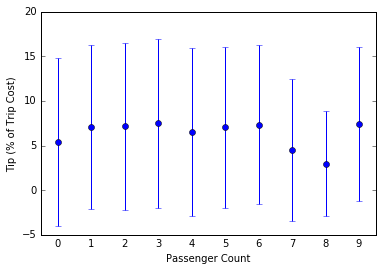

In [14]:
fig, ax = plt.pyplot.subplots()
ax.errorbar(tip_percentages.index, tip_percentages['mean'].values, yerr=tip_percentages['std. dev.'].values, fmt='o')
ax.set_xticks(tip_percentages.index)
ax.set_xlim(-0.5,9.5)
ax.set_ylabel('Tip (% of Trip Cost)')
ax.set_xlabel('Passenger Count')
ax.xaxis.set_ticks_position('none') 

This plot shows negative values clearly not reasonable for a tip amount. This is clearly a function of our application of simple statistics to a truncated distribution. I guess in future we may have to consider the statistics rather than simply making pretty pictures... Here's to that. 

This tutorial closely follows the work of Columbia Univerisity's Application Development Initative for their 2017 DevFest.
We will continue to follow this as we move forwards. The orignal tutorial can be found <a href="https://devfe.st/learn/datascience/">here</a>.

Our thanks to  Lucas Schuermann, Rachel Zhang, Zach Robertson, Jillian Knoll and Ashutosh Nanda.

<h4>Questions? <a href="mailto:ian.davies@moodys.com">Contact me by email</a></h4>